In [1]:
import numpy             as np
import pandas            as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import lux
import prince
from scipy import stats
from datetime import date
from datetime import datetime
from datetime import timedelta
import plotly.express as px

### Lectura dela base de datos 

In [2]:
url='application_record.csv'
df = pd.read_csv(url)
df2= pd.read_csv('credit_record.csv')

In [44]:
df

,ID,GENERO,VEHICULO,PROPIEDADES,CANT_HIJOS,ING_TOTAL_ANUAL,ORIGEN_INGRESO,NIV_ESTUDIO,ESTADO_CIVIL,T_VIVIENDA,FECHA_NACIMIENTO,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,T_OCUPACION,CANT_FAM
0,5008804,0,1,1,0,427500.0,Trabajador,Educación superior,Matrimonio civil,Apartamento alquilado,1987-02-18,-4542,1,1,0,0,NaN,2.0
1,5008805,0,1,1,0,427500.0,Trabajador,Educación superior,Matrimonio civil,Apartamento alquilado,1987-02-18,-4542,1,1,0,0,NaN,2.0
2,5008806,0,1,1,0,112500.0,Trabajador,Especial secundario/secundario,Casado,Casa/apartamento,1961-03-17,-1134,1,0,0,0,Personal de seguridad,2.0
3,5008808,1,0,1,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
4,5008809,1,0,1,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,0,1,0,135000.0,Pensionado,Especial secundario/secundario,Separado,Casa/apartamento,1957-10-21,8280,1,0,0,0,NaN,1.0
438553,6840222,1,0,0,0,103500.0,Trabajador,Especial secundario/secundario,Soltero,Casa/apartamento,1976-05-12,-3007,1,0,0,0,Trabajadores,1.0
438554,6841878,1,0,0,0,54000.0,Asociado comercial,Educación superior,Soltero,Con padres,1997-08-20,-372,1,1,0,0,Personal de ventas,1.0
438555,6842765,1,0,1,0,72000.0,Pensionado,Especial secundario/secundario,Casado,Casa/apartamento,1960-08-30,8280,1,0,0,0,NaN,2.0


In [41]:
df3 = df2[df2.ID.isin(df.ID.unique())]

In [42]:
df3

,ID,MONTHS_BALANCE,STATUS
92938,5008804,0,C
92939,5008804,-1,C
92940,5008804,-2,C
92941,5008804,-3,C
92942,5008804,-4,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [43]:
df3.pivot('ID','MONTHS_BALANCE',values='STATUS')

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5008804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C
5008805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C
5008806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,X,C,C,C,C,C,C,C
5008808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,X,X,0,X,0
5008809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,C


### Cambiar nombre de las columnas

In [5]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [6]:
renombrar = {'CODE_GENDER': 'GENERO',
            'FLAG_OWN_CAR': 'VEHICULO',
            'FLAG_OWN_REALTY': 'PROPIEDADES',
            'CNT_CHILDREN': 'CANT_HIJOS',
            'AMT_INCOME_TOTAL': 'ING_TOTAL_ANUAL',
            'NAME_INCOME_TYPE': 'ORIGEN_INGRESO',
            'NAME_EDUCATION_TYPE': 'NIV_ESTUDIO',
            'NAME_FAMILY_STATUS':  'ESTADO_CIVIL',
            'NAME_HOUSING_TYPE': 'T_VIVIENDA',
            'DAYS_BIRTH' : 'FECHA_NACIMIENTO',
            'DAYS_EMPLOYED': 'EMPLEADO',
            'FLAG_MOBIL': 'TIENE_CEL',
            'FLAG_WORK_PHONE': 'TIENE_TEL_TRJ',
            'FLAG_PHONE': 'TIENE_TELFIJO',
            'FLAG_EMAIL': 'TIENE_EMAIL',
            'OCCUPATION_TYPE':'T_OCUPACION',
            'CNT_FAM_MEMBERS': 'CANT_FAM'
           }
df.columns = [renombrar.get(x, x) for x in df.columns] 


In [7]:
df.head()

,ID,GENERO,VEHICULO,PROPIEDADES,CANT_HIJOS,ING_TOTAL_ANUAL,ORIGEN_INGRESO,NIV_ESTUDIO,ESTADO_CIVIL,T_VIVIENDA,FECHA_NACIMIENTO,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,T_OCUPACION,CANT_FAM
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


### Arreglar datos.

In [8]:
renombrar_ori_ingreso = {'Working': 'Trabajador',
            'Commercial associate': 'Asociado comercial',
            'Pensioner': 'Pensionado',
            'State servant': 'Servidor publico',
            'Student': 'Estudiante'
           }
renombrar_niv_estudio = {'Higher education': 'Educación superior',
            'Secondary / secondary special': 'Especial secundario/secundario',
            'Incomplete higher': 'Superior incompleto',
            'Lower secondary': 'Secundaria inferior',
            'Academic degree': 'Grado académico'
           }
renombrar_estado_civil = {'Civil marriage': 'Matrimonio civil',
            'Married': 'Casado',
            'Single / not married': 'Soltero',
            'Separated': 'Separado',
            'Widow': 'Viudo'
           }
renombrar_vivienda = {'Rented apartment': 'Apartamento alquilado',
            'House / apartment': 'Casa/apartamento',
            'Municipal apartment': 'Piso municipal',
            'Co-op apartment': 'Apt compartido',
            'Office apartment': 'Apartamento oficina',
            'With parents': 'Con padres'
           }
renombrar_ocupacion = {'Security staff': 'Personal de seguridad',
            'Sales staff': 'Personal de ventas',
            'Accountants': 'Contadores',
            'Laborers': 'Trabajadores',
            'Managers': 'Gerentes',
            'Drivers': 'Conductores',
            'Core staff': 'Personal básico',
            'High skill tech staff':  'Personal de alta tecnología de alta cualificación',
            'Cleaning staff': 'Personal de limpieza',
            'Private service staff' : 'Personal de servicio privado',
            'Cooking staff': 'Personal de cocina',
            'Low-skill Laborers': 'Trabajadores de baja cualificación',
            'Medicine staff': 'Personal de medicina',
            'Secretaries': 'Secretarios',
            'Waiters/barmen staff': 'Camareros',
            'HR staff':'Personal de recursos humanos',
            'Realty agents': 'Agentes de bienes raíces',
            'IT staff': 'Personal de TI'
           }
df.ORIGEN_INGRESO = [renombrar_ori_ingreso.get(x, x) for x in df.ORIGEN_INGRESO]
df.NIV_ESTUDIO = [renombrar_niv_estudio.get(x, x) for x in df.NIV_ESTUDIO] 
df.ESTADO_CIVIL = [renombrar_estado_civil.get(x, x) for x in df.ESTADO_CIVIL] 
df.T_VIVIENDA = [renombrar_vivienda.get(x, x) for x in df.T_VIVIENDA] 
df.T_OCUPACION = [renombrar_ocupacion.get(x, x) for x in df.T_OCUPACION] 

In [9]:
fecha_final = datetime(2020,1, 1)
df.FECHA_NACIMIENTO = [fecha_final - timedelta(days=-(n)) for n in df.FECHA_NACIMIENTO]
df.GENERO = [1 if n=='F' else 0 for n in df.GENERO]
df.VEHICULO = [1 if n=='Y' else 0 for n in df.VEHICULO]
df.PROPIEDADES = [1 if n=='Y' else 0 for n in df.PROPIEDADES]
df.EMPLEADO = [8280 if n==365243 else n for n in df.EMPLEADO]

In [10]:
df

,ID,GENERO,VEHICULO,PROPIEDADES,CANT_HIJOS,ING_TOTAL_ANUAL,ORIGEN_INGRESO,NIV_ESTUDIO,ESTADO_CIVIL,T_VIVIENDA,FECHA_NACIMIENTO,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,T_OCUPACION,CANT_FAM
0,5008804,0,1,1,0,427500.0,Trabajador,Educación superior,Matrimonio civil,Apartamento alquilado,1987-02-18,-4542,1,1,0,0,NaN,2.0
1,5008805,0,1,1,0,427500.0,Trabajador,Educación superior,Matrimonio civil,Apartamento alquilado,1987-02-18,-4542,1,1,0,0,NaN,2.0
2,5008806,0,1,1,0,112500.0,Trabajador,Especial secundario/secundario,Casado,Casa/apartamento,1961-03-17,-1134,1,0,0,0,Personal de seguridad,2.0
3,5008808,1,0,1,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
4,5008809,1,0,1,0,270000.0,Asociado comercial,Especial secundario/secundario,Soltero,Casa/apartamento,1967-09-06,-3051,1,0,1,1,Personal de ventas,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,0,1,0,135000.0,Pensionado,Especial secundario/secundario,Separado,Casa/apartamento,1957-10-21,8280,1,0,0,0,NaN,1.0
438553,6840222,1,0,0,0,103500.0,Trabajador,Especial secundario/secundario,Soltero,Casa/apartamento,1976-05-12,-3007,1,0,0,0,Trabajadores,1.0
438554,6841878,1,0,0,0,54000.0,Asociado comercial,Educación superior,Soltero,Con padres,1997-08-20,-372,1,1,0,0,Personal de ventas,1.0
438555,6842765,1,0,1,0,72000.0,Pensionado,Especial secundario/secundario,Casado,Casa/apartamento,1960-08-30,8280,1,0,0,0,NaN,2.0


In [11]:
df.describe().round(2)

,ID,GENERO,VEHICULO,PROPIEDADES,CANT_HIJOS,ING_TOTAL_ANUAL,EMPLEADO,TIENE_CEL,TIENE_TEL_TRJ,TIENE_TELFIJO,TIENE_EMAIL,CANT_FAM
count,438557.00,438557.00,438557.00,438557.00,438557.00,438557.00,438557.00,438557.0,438557.00,438557.00,438557.00,438557.00
mean,6022176.27,0.67,0.37,0.69,0.43,187524.29,-750.28,1.0,0.21,0.29,0.11,2.19
std,571637.02,0.47,0.48,0.46,0.72,110086.85,4656.22,0.0,0.40,0.45,0.31,0.90
min,5008804.00,0.00,0.00,0.00,0.00,26100.00,-17531.00,1.0,0.00,0.00,0.00,1.00
25%,5609375.00,0.00,0.00,0.00,0.00,121500.00,-3103.00,1.0,0.00,0.00,0.00,2.00
50%,6047745.00,1.00,0.00,1.00,0.00,160780.50,-1467.00,1.0,0.00,0.00,0.00,2.00
75%,6456971.00,1.00,1.00,1.00,1.00,225000.00,-371.00,1.0,0.00,1.00,0.00,3.00
max,7999952.00,1.00,1.00,1.00,19.00,6750000.00,8280.00,1.0,1.00,1.00,1.00,20.00


In [14]:
pensionados = df[df['EMPLEADO']==365243.00]['FECHA_NACIMIENTO'].unique()

C:\Users\smypi\Anaconda3\envs\SegundoSemestre\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='EMPLEADO'>

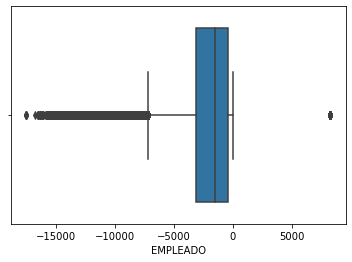

In [16]:
sns.boxplot(df['EMPLEADO'])

In [32]:
df.dtypes

ID                           int64
GENERO                       int64
VEHICULO                     int64
PROPIEDADES                  int64
CANT_HIJOS                   int64
ING_TOTAL_ANUAL            float64
ORIGEN_INGRESO              object
NIV_ESTUDIO                 object
ESTADO_CIVIL                object
T_VIVIENDA                  object
FECHA_NACIMIENTO    datetime64[ns]
EMPLEADO                     int64
TIENE_CEL                    int64
TIENE_TEL_TRJ                int64
TIENE_TELFIJO                int64
TIENE_EMAIL                  int64
T_OCUPACION                 object
CANT_FAM                   float64
dtype: object

In [ ]:
## SE ELEMINA ESTA COLUMNA DEL DATAFRAME YA QUE TIENE EL MISMO VALOR EN TODAS SUS FILAS,
## DE MANERA QUE NO REPRESANTE CARACTERIZACION ALGUNA 
del(df['TIENE_CEL'])

In [17]:
df
df1 = pd.DataFrame(data = df
             , columns = ['GENERO','VEHICULO','PROPIEDADES', 'ORIGEN_INGRESO', 'NIV_ESTUDIO', 'ESTADO_CIVIL',
       'T_VIVIENDA', 'T_OCUPACION'])

In [18]:
mca = prince.MCA(
    n_components=4,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto')
mca = mca.fit(df1)

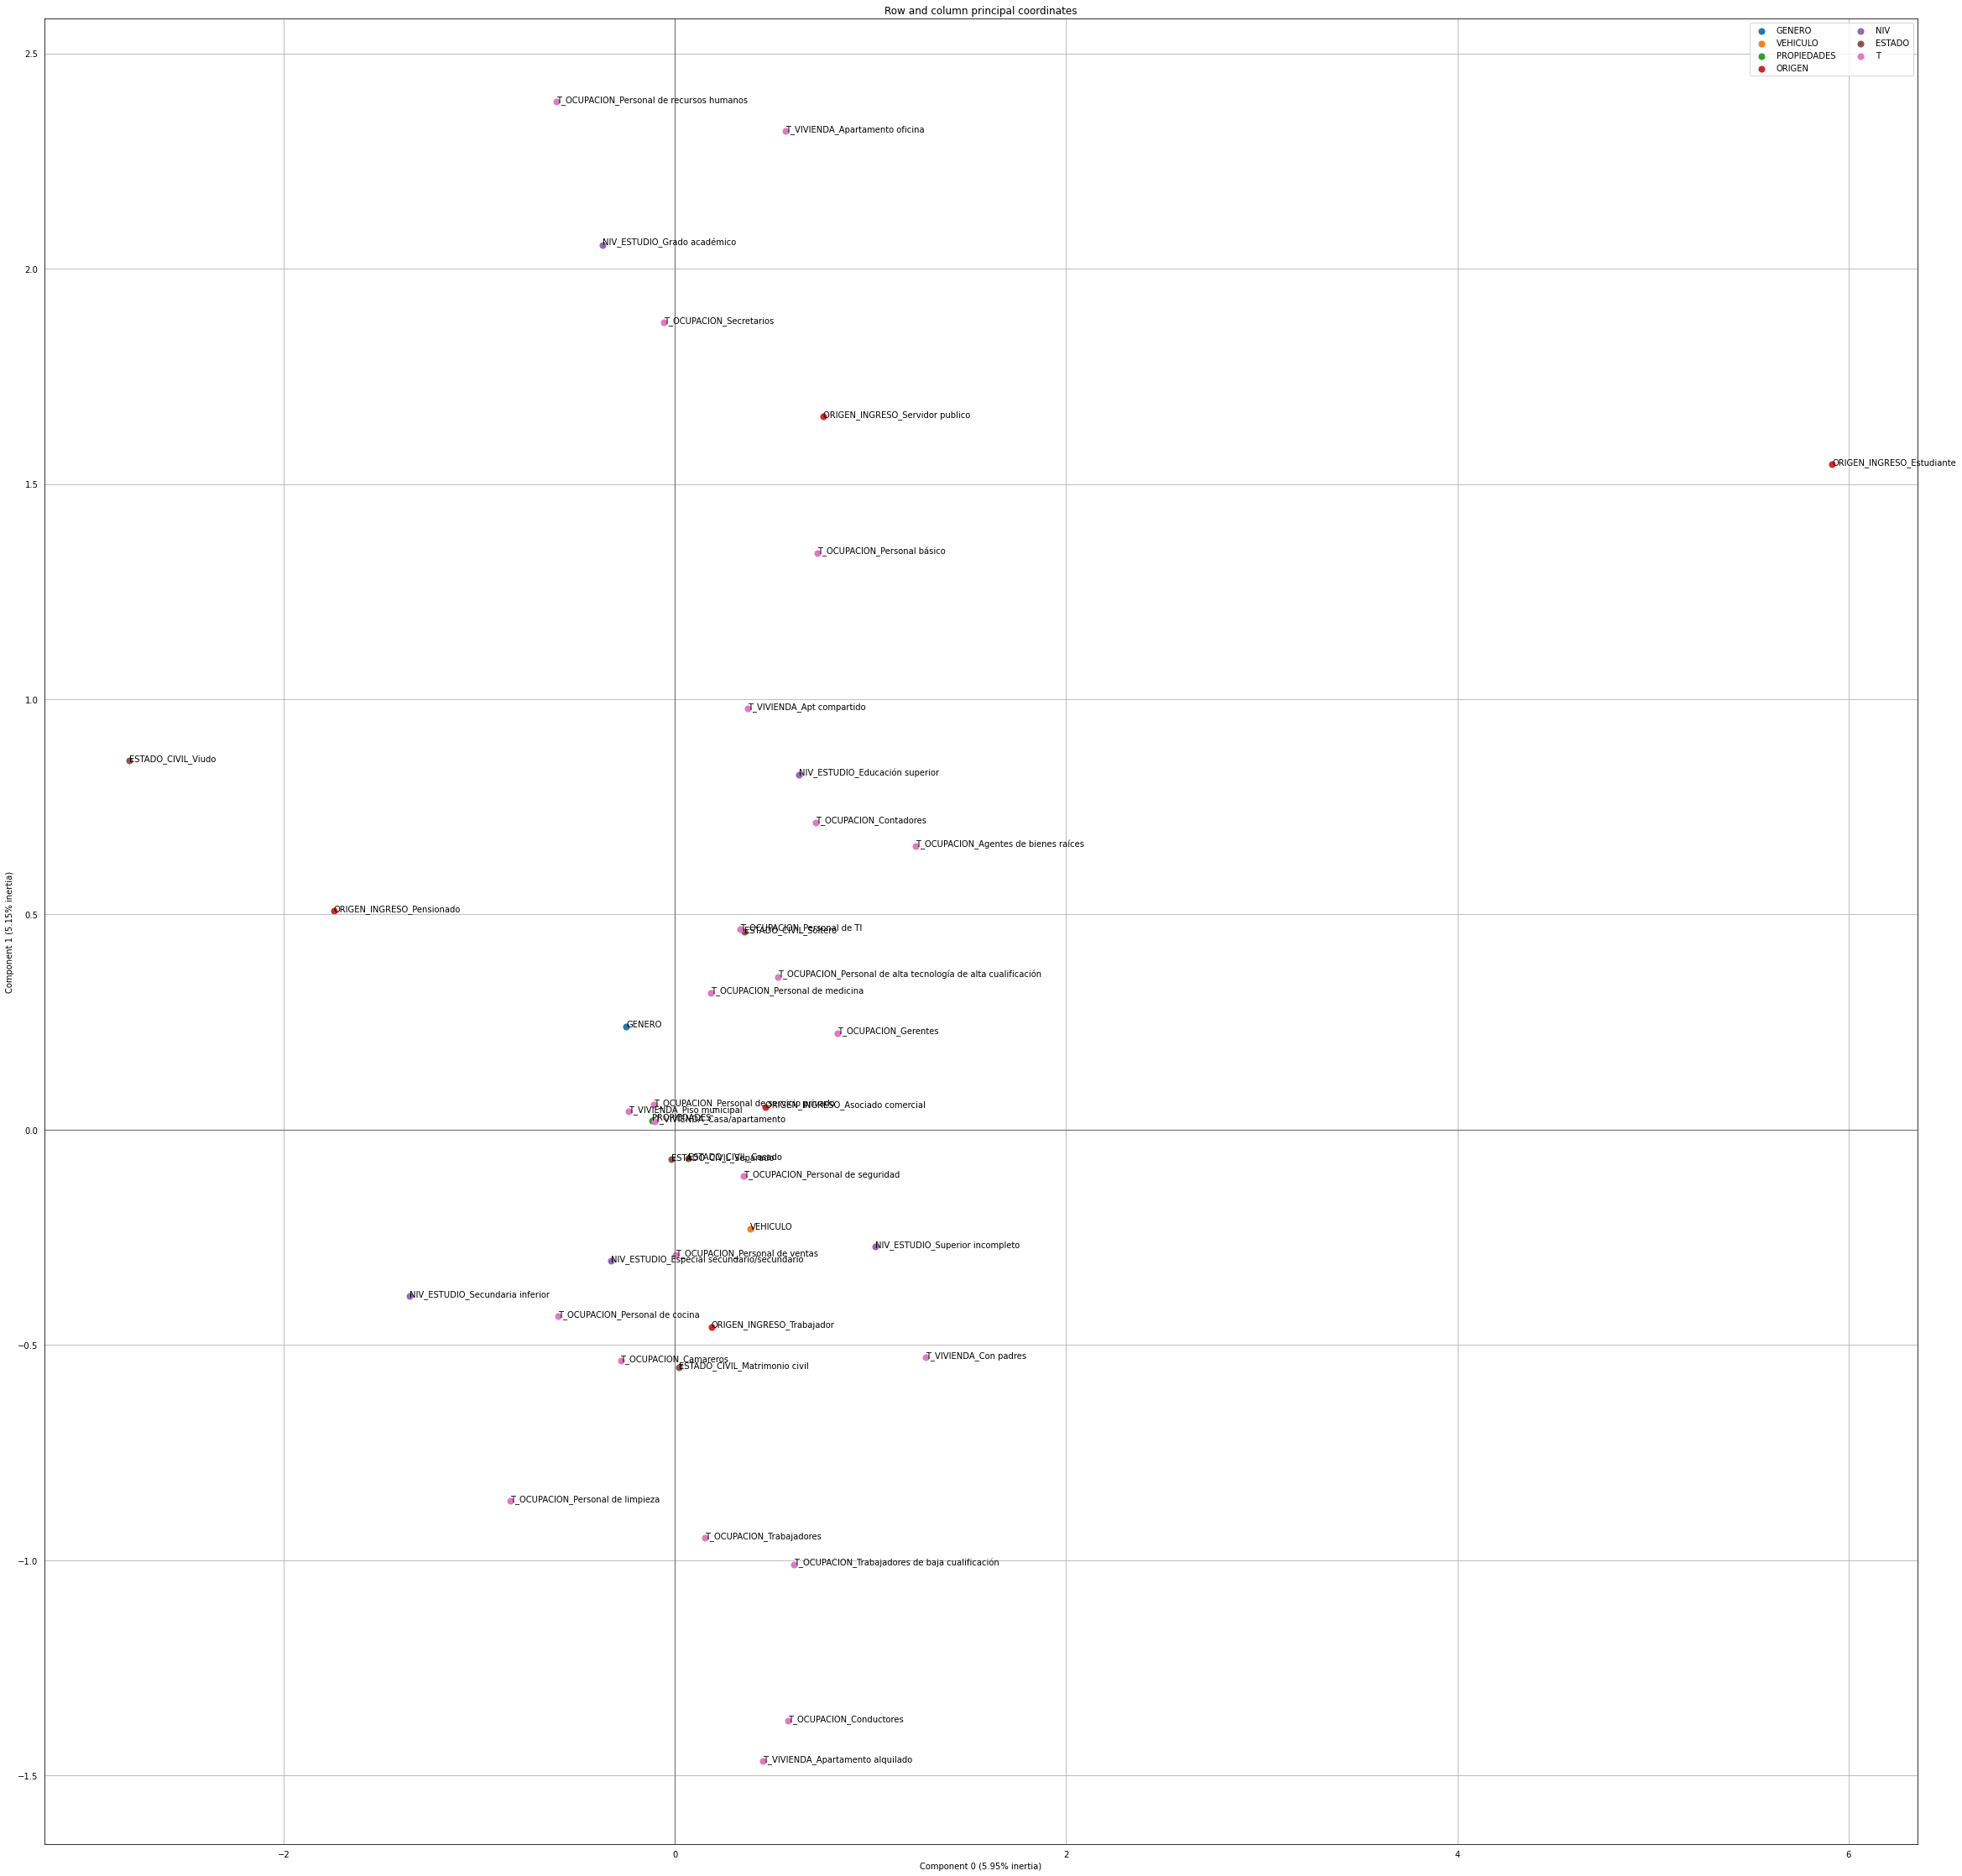

In [19]:
ax = mca.plot_coordinates(
    X=df1,
    ax=None,
    x_component=0,
    y_component=1,
    figsize=(40, 40),
    show_row_points=False,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=50,
    show_column_labels=True,
    legend_n_cols=2)

In [20]:
mca.explained_inertia_

[0.05952967154568985,
 0.05146939075667033,
 0.043711625164542696,
 0.041983306164071005]

### Correlacion

In [ ]:
#fig = px.imshow(df)
#fig.show()

In [ ]:
def correlacion_spearman(datos,anotacion,ancho=20,alto=15):

    cuanti=datos.select_dtypes(np.number)

    correlacion_global=datos.corr(method='spearman')


    rho,p_value = stats.spearmanr(cuanti)
    rho = list(p_value)
    for i in range(len(p_value)):
        p_value[i]= list(p_value[i])
    p_value = pd.DataFrame(p_value)
    Significancia = p_value < 0.05


    mask =np.triu(correlacion_global, k=1)

    sns.set(font_scale=1.7)
    fig, scatter = plt.subplots(figsize = (ancho,alto))
    sns.heatmap(data=correlacion_global.round(decimals=2), 
                xticklabels=correlacion_global.columns,
                yticklabels=correlacion_global.columns,
                cmap='RdBu_r',
                annot=anotacion,
                linewidth=0.5,
                mask=mask)

In [ ]:
correlacion_spearman(df,True,30,20)